In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
files = 'results_EoR/{}_{}.pkl'

In [3]:
def get(model, dataset, seed=None):
    data = dict()
    with open(files.format(model, dataset), 'rb') as f:
        while True:
            try:
                out = pickle.load(f)
                data[str(out[0])]=out
            except EOFError:
                break
    if seed is None:
        return data
    else:
        return data[str(seed)]

In [4]:
models = ['None', 'RNI', 'CLIP', 'ORNI', 'IRNI']
datasets = ['PROTEINS', 'MUTAG', 'NCI1', 'TRI', 'TRIX', 'EXP', 'CEXP', 'CSL']

In [5]:
def get_performance_table(models, datasets):
    count = 0
    result = []
    result+=[[]]
    result[-1]+=['Models']
    for dataset in datasets:
        result[-1]+=[dataset]

    for model in models:
        result+=[[]]
        result[-1]+=[model]
        for dataset in datasets:
            try:
                values = [x[1] for x in get(model, dataset).values()]
                mean = np.mean(values)
                if len(values) == 1:
                    result[-1]+=['{:.2f}\pm ?.??'.format(mean,std)]
                else:
                    std = np.std(values)
                    result[-1]+=['{:.2f}\pm {:.2f}'.format(mean,std)]
                count+=len(values)
            except OSError:
                result[-1]+=['?.??\pm ?.??']
    print(count, 'values')
    return result

In [6]:
table = get_performance_table(models, datasets)
first = True
for row in table:
    if first:
        for col in row:
            print(col, end=' ')
        print()
        first=False
    else:
        for col in row:
            print('${}$'.format(col), end=' & ')
        print('\\\\')

328 values
Models PROTEINS MUTAG NCI1 TRI TRIX EXP CEXP CSL 
$None$ & $0.68\pm 0.06$ & $0.89\pm 0.06$ & $0.82\pm 0.01$ & $0.50\pm 0.00$ & $0.50\pm 0.00$ & $0.50\pm 0.01$ & $0.74\pm 0.02$ & $0.50\pm 0.00$ & \\
$RNI$ & $0.66\pm 0.02$ & $0.89\pm 0.04$ & $0.80\pm 0.01$ & $0.99\pm 0.00$ & $0.99\pm 0.00$ & $0.98\pm 0.02$ & $0.99\pm 0.02$ & $0.85\pm 0.06$ & \\
$CLIP$ & $0.65\pm 0.05$ & $0.85\pm 0.09$ & $0.81\pm 0.00$ & $0.99\pm 0.00$ & $0.80\pm 0.05$ & $0.98\pm 0.05$ & $1.00\pm 0.01$ & $1.00\pm 0.01$ & \\
$ORNI$ & $0.74\pm 0.04$ & $0.86\pm 0.07$ & $0.81\pm 0.01$ & $0.99\pm 0.00$ & $0.82\pm 0.03$ & $0.97\pm 0.02$ & $0.96\pm 0.02$ & $1.00\pm 0.00$ & \\
$IRNI$ & $0.75\pm 0.04$ & $0.85\pm 0.05$ & $0.81\pm 0.01$ & $0.99\pm 0.01$ & $0.73\pm 0.04$ & $0.98\pm 0.05$ & $0.94\pm 0.15$ & $1.00\pm 0.00$ & \\


In [7]:
def plot_bayes_sampling(model, dataset, seed):
    relevant = get(model, dataset, seed)[3]
    relevant = [x[1] for x in relevant]
    minimum_list = []
    minimum = 0
    for x in relevant:
        if x<minimum:
            minimum=x
        minimum_list+=[minimum]
    plt.plot(minimum_list)
    plt.show()

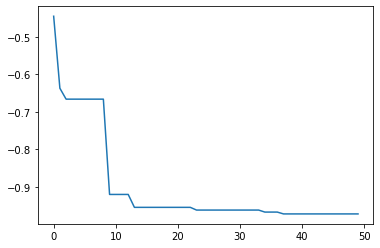

In [8]:
plot_bayes_sampling('RNI', 'EXP', 0)

In [9]:
def get_avg_settings_table(models, dataset):
    result = []
    result+=[[]]
    result[-1]+=['Models']
    for setting in ['BS', 'E', 'LR', 'WD', 'F', 'L', 'D', 'SS', 'E']:
        result[-1]+=[setting]
    for model in models:
        result+=[[]]
        result[-1]+=[model]
        try:
            values = np.array(get(model, dataset, 0)[2][0][:-2])[None,...]
            for i in range(1, len(get(model, dataset).values())):
                values = np.concatenate((values, np.array(get(model, dataset, i)[2][0][:-2], dtype=np.float64)[None,...]), axis=0)
            for mean, std in zip(np.mean(values, axis=0), np.std(values, axis=0)):
                result[-1]+=['{:.2f}+-{:.2f}'.format(mean,std)]
        except OSError:
            result[-1]+=['?']
    return result

In [10]:
table = get_avg_settings_table(models, 'EXP')
for row in table:
    for col in row:
        print(col, end=' ')
    print()

Models BS E LR WD F L D SS E 
None 224.50+-50.58 240.50+-178.68 -3.96+-1.86 -4.31+-4.02 65.67+-42.24 5.17+-2.54 2.50+-1.80 0.47+-0.34 1.00+-0.00 
RNI 164.00+-83.70 433.75+-78.75 -2.75+-0.48 -8.33+-1.09 50.50+-18.98 7.75+-1.48 3.00+-2.00 0.35+-0.09 1.00+-0.00 
CLIP 231.50+-24.50 192.50+-73.50 -2.73+-0.06 -9.55+-0.45 19.00+-3.00 7.50+-0.50 2.00+-0.00 0.61+-0.18 1.00+-0.00 
ORNI 114.33+-103.63 382.00+-78.96 -3.47+-0.16 -7.73+-1.61 59.00+-49.28 8.67+-1.25 4.67+-0.47 0.47+-0.23 1.00+-0.00 
IRNI 240.50+-15.50 194.00+-162.00 -3.13+-0.00 -8.75+-1.25 49.50+-5.50 9.50+-0.50 1.00+-0.00 0.76+-0.24 1.00+-0.00 
